# Multilayer Perceptron (Tensorflow - Two spiral Dataset)

Next we will look at a more complex classification task. The two spiral dataset consists of (x,y) coordinates of two alternating spirals, as can be seen in the following image. The aim of this exercise is to train a multilayer perceptron (MLP) to correctly classify an (x,y) coordinate.

![alt text](images/two_spiral.png "Two Spiral Dataset")


Instead of generating the dataset, we will read it from a file that takes the following form:

|    x   |    y   | class |
|:------:|:------:|:-----:|
|  -6.5  |   0.0  |   0   |
|  -6.5  |  -0.0  |   1   |
|  6.314 |  1.256 |   0   |
| -6.314 | -1.256 |   1   |
|   ...  |   ...  |  ...  |

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
#from tools import plot_confusion_matrix

import csv
import tensorflow as tf
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt

def read_file(filename="projecta/Auto_train.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y

x, y = read_file()

In [10]:
print(y)

[[3], [1], [1], [1], [1], [2], [3], [3], [1], [2], [1], [2], [3], [2], [1], [1], [1], [1], [3], [1], [2], [1], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [1], [3], [1], [1], [1], [3], [2], [3], [2], [3], [2], [1], [3], [3], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [3], [3], [1], [3], [1], [1], [3], [2], [2], [2], [2], [2], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [3], [1], [1], [2], [1], [2], [1], [1], [1], [3], [2], [1], [1], [1], [1], [2], [3], [1], [3], [1], [1], [1], [1], [2], [3], [3], [3], [3], [3], [1], [3], [2], [2], [2], [2], [3], [2], [3], [2], [3], [3], [2], [1], [3], [1], [1], [1], [1], [1], [3], [1], [3], [3], [3], [3], [3], [1], [1], [1], [2], [2], [3], [3], [3], [3], [2], [2], [3], [3], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [2], [3], [3], [1], [1], [3], [3], [3], [3], [3], [3], [1], [1], [1], [1], [3], [1], [1], [1], [2], [1], [1], [1], [1],

Next, we will build a multilayered neural network model. We will use **two** hidden layers and will therefore need three sets of weights (one connecting the input layer to the first hidden layer, another connecting the first hidden layer to the second hidden layer, and another connecting the second hidden layer to the output layer). In this example, each hidden layer is set to have 40 neurons. This is an arbitrary number -- feel free to play around with the network's configuration and change this number.

In [11]:
# Create the model
x_ = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1])

neur = 100

# Create first layer weights
layer_0_weights = tf.Variable(tf.random_normal([2, neur]))
layer_0_bias = tf.Variable(tf.random_normal([neur]))
layer_0 = tf.nn.sigmoid(tf.add((tf.matmul(x_, layer_0_weights)), layer_0_bias))

# Create second layer weights
layer_1_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_1_bias = tf.Variable(tf.random_normal([neur]))
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(layer_0, layer_1_weights), layer_1_bias))

# Create second layer weights
layer_2_weights = tf.Variable(tf.random_normal([neur, neur]))
layer_2_bias = tf.Variable(tf.random_normal([neur]))
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, layer_2_weights), layer_2_bias))

# Create third layer weights
layer_3_weights = tf.Variable(tf.random_normal([neur, 1]))
layer_3_bias = tf.Variable(tf.random_normal([1]))
layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, layer_3_weights), layer_3_bias))

In [12]:
print(x_)

Tensor("Placeholder_2:0", shape=(?, 2), dtype=float32)


Again, we will use the same error function and optimizer we used in the previous example and train the network in the same way.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Training...


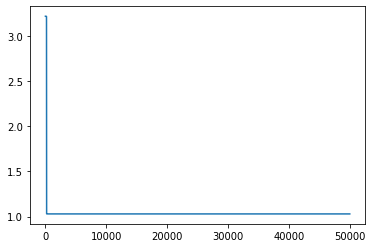

In [13]:
# Define error function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_, predictions=layer_3))

# Define optimizer and its task (minimise error function)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.5).minimize(cost)

N_EPOCHS = 50000 #Increase the number of epochs to about 50000 to get better results. This will take some time for training.

sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

print('Training...')

errors = []

# Train
for i in range(N_EPOCHS):
    _, error = sess.run([optimizer,cost], feed_dict={x_: x, y_: y})
    errors.append(error)
    
plt.plot(errors)
plt.show()       

In other examples it makes sense to test the trained model on the training dataset and display the predictions alongside the targets. For this dataset, it makes more sense to display our results visually. We are going to construct our own test set of coordinates, activate on each coordinate, and then display the activations.

A good result is to have two, well separated, spirals. Play around with the network configuration (number of hidden layers and number of units per hidden layer) and the number of training epochs to explore how they effect model accuracy.

In [14]:
# Display predictions
classifications = round(sess.run(layer_3, feed_dict={x_: x}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)

In [15]:
#y2 = np.zeros(len(y)) #np.ones((3,2))
y2 = list(np.zeros(len(y)))           
for i in range(0, len(y)): y2[i] = int(y[i][0]) 
    
class2 = list(np.zeros(len(classifications))) 
for i in range(0, len(classifications)): class2[i] = int(classifications[i][0])

In [16]:
confusion_matrix = np.zeros((2,2))

for true_label, predicted_label in zip(y2, class2):
    confusion_matrix[true_label][predicted_label] += 1
    
#confusion_matrix[y2][class2]

IndexError: index 3 is out of bounds for axis 0 with size 2

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,normalize,title,cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks([-0.5, 0.5, 1.5], classes, rotation=90)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j],2),
                 horizontalalignment="center",
                 verticalalignment='center',
                 color="white" if cm[i, j] > thresh else "black")
    
        plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#from tools import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Heart Disease','No Heart Disease'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Heart Disease','No Heart Disease'], normalize=True, title='Normalized confusion matrix')

plt.show()

In [ ]:
def read_file(filename="projecta/Auto_test.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y

x, y = read_file()

In [ ]:
# Display predictions
classifications = round(sess.run(layer_3, feed_dict={x_: x}))
#for input, target, prediction in zip(x, y, classifications):
#    print("input",input,"target",target,"prediction",prediction)

In [ ]:
#y2 = np.zeros(len(y)) #np.ones((3,2))
y2 = list(np.zeros(len(y)))           
for i in range(0, len(y)): y2[i] = int(y[i][0]) 
    
class2 = list(np.zeros(len(classifications))) 
for i in range(0, len(classifications)): class2[i] = int(classifications[i][0])

In [ ]:
confusion_matrix = np.zeros((2,2))

for true_label, predicted_label in zip(y2, class2):
    confusion_matrix[true_label][predicted_label] += 1
    
#confusion_matrix[y2][class2]

In [ ]:
#from tools import plot_confusion_matrix

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Heart Disease','No Heart Disease'], normalize=False, title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(confusion_matrix, classes=['Heart Disease','No Heart Disease'], normalize=True, title='Normalized confusion matrix')

plt.show()